In [94]:
# imports
import numpy as np
from scipy.optimize import fsolve
from scipy.special import factorial
import matplotlib.pyplot as plt
import networkx as nx
import networkx.generators.random_graphs as rg
import random

# Assignment 1
_Social graphs and interactions (02805)_

## Part 2: Random networks and plotting in `networkx`

### A. In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.

* Erdős-Rényi Networks

Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability $p = 10^{–3}$.

* What is the expected number of links, $〈L〉$?

The maximum number of links $L_{max}$  is computed using the following formula: 

$L_{max} = \frac{N(N-1)}{2}$

Given the probability $p = 10^{–3}$ of nodes connected to each other we can computed the expected number of links:

In [95]:
N = 3000 # number of nodes
p = 1e-3 # probability of nodes being connected
(L) = (p * N * (N - 1)) / 2
print('expected number of links <L>:', (L))

expected number of links <L>: 4498.5


* In which regime is the network?

The regime can easily be tested given *N* and *p* as follows:

In [96]:
print("Subcritical Regime: ", p < 1 / N)
print("Critical Point: ", p == 1 / N)
print("Supercritical Regime: ", p > 1 / N)
print("Connected Regime: ", p > np.log(N) / N)

Subcritical Regime:  False
Critical Point:  False
Supercritical Regime:  True
Connected Regime:  False


Thus, it can be said that the network is in the supercritical regime. Having one gaint component where numerous isolated components coexist with the gaint component - the supercritical regime lasting until all nodes are absorbed by the gaint component.

* Calculate the probability $p_{c}$ so that the network is at the critical point.

The probability $p_{c}$ so that the network is at the critical point is computed using the following formula: $p = \frac{1}{(N-1)}$

In [97]:
p_c = 1 / (N - 1)
print('Critical Point:', p_c)

Critical Point: 0.00033344448149383126


* Given the linking probability $p = 10^{–3}$, calculate the number of nodes $N^{cr}$ so that the network has only one component.

The number of nodes $N^{cr}$ given the linking probability $p = 10^{–3}$ is computed using scipy.optimize in order to satisfy the equation $p = \frac{ln(N)}{N}$ so that the network is within the connected regime (having only one component):

In [98]:
# first the equation is defined as a funtion of N
def ncr_connected(N):
    p = 1e-3
    y = (np.log(N) / N) - p
    return y

y_guess = 10000 # guess
ncr = fsolve(ncr_connected, y_guess) # 
print("Number of nodes (Ncr): ", ncr)

Number of nodes (Ncr):  [9118.0064704]


Thus, given the linking probability $p = 10^{–3}$ the number of nodes is ~ 9118 so that the network is within the connected regime (having only one component).

* For the network in (d), calculate the average degree  $〈k^{cr}〉$ and the average distance between two randomly chosen nodes $〈d〉$.

The average degree $〈k^{cr}〉$ is computed using the following formula: 

$〈k^{cr}〉 = p_{cr}\cdot(N_{cr}-1)$

and the average distance $〈d〉$ between two randomly chosen nodes is computed using the following formula:

$〈d〉 = \frac{ln(N)}{ln(〈k^{cr}〉)}$

In [99]:
kcr = p*(ncr - 1)
print("<k_cr>:", kcr)

d = np.log(ncr) / np.log(kcr)
print("<d>:", d)

<k_cr>: [9.11700647]
<d>: [4.12553061]


Thus, the average degree $〈k^{cr}〉$ is ~ 9.1170 and the average distance between two randomly chosen nodes $〈d〉$ is ~ 4.1255.

* Calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution).

The degree distribution $p_k$ of the network is approximated using the possion form:

$p_k = e^{-〈k〉} \frac{〈d〉^k}{k!}$

pk: [0.13165633]


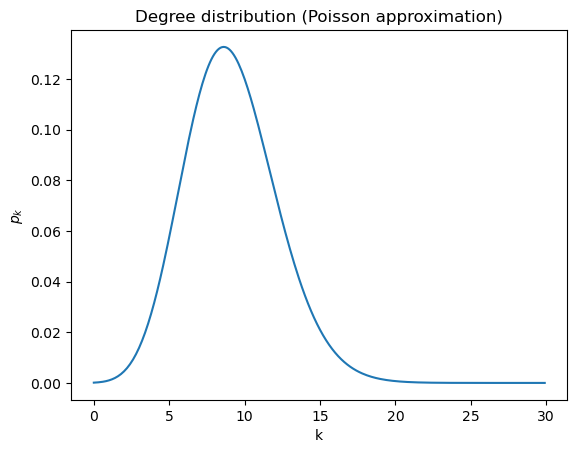

In [100]:
k = p * (ncr - 1)

k = int(k)
pk = np.exp(-kcr) * (kcr**k / np.math.factorial(k))

print("pk:", pk)

t = np.arange(0, 30, 0.1)
d = np.exp(-kcr)*np.power(kcr, t)/factorial(t)
plt.title("Degree distribution (Poisson approximation)")
plt.ylabel("$p_{k}$")
plt.xlabel("k")
plt.plot(t, d)
plt.show()

The degree distribution is shown in the plot above with it's peak around $〈k^{cr}〉 \approx 9.1170$ and $p_{k} \approx 0.13$.

### B. Paths. Plot a random network with 200 nodes and an average degree of 1.5. (I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).

Given $N = 200$ and $〈k〉 = 1.5$ the probability $p$ which we need is computed using the following formula:

$〈k〉 = p(N - 1) \Leftrightarrow p = \frac{〈k〉}{p(N-1)}$

In [101]:
# computing p using the given variables and the formula
N = 200
k_avg = 1.5
p = k_avg / (N - 1)

Next the random network is generated and plotted using `networkx`

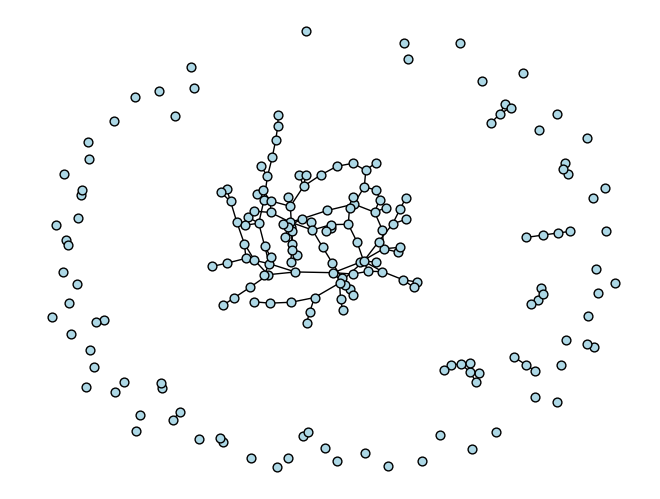

In [102]:
RG = rg.gnp_random_graph(N, p, seed=24, directed=False) # generate random network

# style arguments
options = {
   'node_size': 40,
   'node_shape': 'o',
   'edgecolors': 'black' 
}

nx.draw(RG, node_color = 'lightblue', **options) # plot the network
plt.show()

One giant connected component and multiple smaller components with fewer connections is seen in the generated random network plot shown above as well as many unconnected nodes.

* Extract the Giant Connected Component, GCC. (Hint. You can use networkx.connected_component_subgraphs)

The Giant Connected Component (GCC) is extracted by first getting the nodes of the largest component using `networkx.max(nx.connected_components(G)` and then by creating a subgraph of said nodes `G.subgraph(c).copy()`

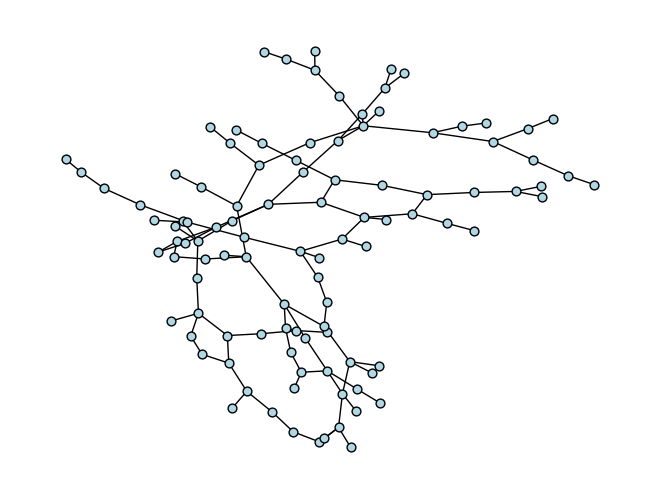

In [103]:
largest_cc = max(nx.connected_components(RG), key=len) # get nodes of largest component
GCC = RG.subgraph(largest_cc).copy() # create GCC as a copy of the subgraph largest_cc

# plot giant connected component
nx.draw(GCC, node_color = 'lightblue', **options) 
plt.show()

* Choose a node at random from the GCC. (Hint: You may want to try random.choice.)

Then a random node is chosen using random.choice

In [104]:
GCC_nodes = list(GCC.nodes) # create list of nodes
random_node = random.choice(GCC_nodes) # chose a random node from the list of nodes
print("Chosen random node:", random_node)

Chosen random node: 156


* Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest networkx.single_source_shortest_path_length)

The *length* to each from the randomly chosen node is then computed using `networkx.single_source_shortest_path_length`

In [105]:
length = nx.single_source_shortest_path_length(GCC, random_node)

Next one can find and print all nodes that are precisely 2 steps away from the chosen node

In [106]:
def get_nodes_with_length(d, val):
    return [key for key, value in d.items() if value == val]

nodes = get_nodes_with_length(length, 2)
print("nodes that are precisely 2 steps away from the chosen node:", nodes)

nodes that are precisely 2 steps away from the chosen node: [128, 132, 104, 80, 51, 189]


* Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2"). Again, I suggest using networkx.draw() and reading the documentation carefully find out how to color individual nodes.

Using the previously created dict containing nodes and lengths from the source (randomly chosen node) a color map can be created

In [107]:
color_map = []
for node in GCC: # for each node in the giant connected component
    if length[node] == 0: # starting node
        color_map.append("#000000") 
    elif length[node] == 2: # nodes 2-steps away
        color_map.append("#ff0000") 
    else: # all other nodes
        color_map.append("#A0CBE2") 

Then, the graph is plotted using the color map

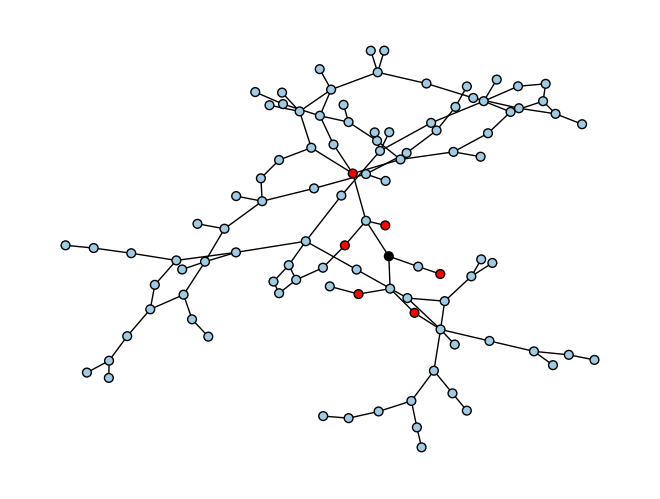

In [114]:
nx.draw(GCC, node_color = color_map, **options)
plt.show()

The plot above show the Giant Connected Component from the generated random network with the randomly chosen node colored black and nodes that are precisely 2 steps away from the chosen node colored red. 